# Import necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
# libaries to help with data visualization
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

#Library for missing values
import missingno as msno

# Library to split data
from sklearn.model_selection import train_test_split
# library to import to standardize the data
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#To import different metrics
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error, make_scorer
#Importing classback API
from keras import callbacks
# Importing tensorflow library
import tensorflow as tf

# importing different functions to build models
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout,InputLayer, Input
from tensorflow.keras.models import Sequential
# Importing Batch Normalization
from keras.layers import BatchNormalization
# Importing backend
from tensorflow.keras import backend
# Importing shffule
import random
from random import shuffle
from keras.callbacks import ModelCheckpoint
# Importing optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from  tensorflow.keras.optimizers import SGD

#Gridsearch for hyperparameter optimization
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.neural_network import MLPRegressor
import scikeras
from scikeras.wrappers import KerasRegressor

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

#Import Shap
import shap

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

# Data loading & overview 

In [2]:
All = pd.ExcelFile('allData.xls')
data = pd.read_excel(All, 'Data')
data

,Number,Data source,Selected,Mix number in literature,ASTM type 1 ordinary Portland Cement content (kg/m^3),CEM I 42.5N ordinary Portland Cement content (kg/m^3),CEM I 52.5N ordinary Portland Cement content (kg/m^3),Class C Fly ash content (kg/m^3),Class F Fly ash content (kg/m^3),Slag content (kg/m^3),...,Annual average temperature of exposed environment (Celsius degree),Annual wetting times/rainy days of exposed environment (d),Annual average precipitation of exposed environment (mm),Slump (mm),Average 28-day compressive strength (Mpa),Average 28-day split strength (Mpa),Chloride diffusion coefficient (10-12 m2/s),Average carbonation coefficient (mm/year^0.5),Specimen size,Note
0,NaN,2. Yunusa 2014,NaN,PC-40,0.0,0.0,450.0,0.0,0.0,0.0,...,24.3,0.0,0.0,30.0,75.93,NaN,NaN,3.139,NaN,No significant effect of initial water curing ...
1,NaN,2. Yunusa 2014,NaN,PC-50,0.0,0.0,400.0,0.0,0.0,0.0,...,24.3,0.0,0.0,60.0,64.50,NaN,NaN,4.022,NaN,NaN
2,NaN,2. Yunusa 2014,NaN,PC-60,0.0,0.0,350.0,0.0,0.0,0.0,...,24.3,0.0,0.0,100.0,49.23,NaN,NaN,6.670,NaN,NaN
3,NaN,2. Yunusa 2014,NaN,PC-75,0.0,0.0,300.0,0.0,0.0,0.0,...,24.3,0.0,0.0,140.0,36.00,NaN,NaN,7.945,NaN,NaN
4,NaN,2. Yunusa 2014,NaN,FA-40,0.0,0.0,315.0,0.0,135.0,0.0,...,24.3,0.0,0.0,40.0,62.80,NaN,NaN,6.052,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,NaN,"J48. Farahani, 2015",NaN,W3-4,350.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.550,NaN,150*150*150,NaN
1984,NaN,"J48. Farahani, 2015",NaN,W4-1,380.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.375,NaN,150*150*150,NaN
1985,NaN,"J48. Farahani, 2015",NaN,W4-2,370.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,150*150*150,NaN
1986,NaN,"J48. Farahani, 2015",NaN,W4-3,360.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.500,NaN,150*150*150,NaN


In [3]:
data.isnull().sum()

Number                                                                1988
Data source                                                              0
Selected                                                              1794
Mix number in literature                                                 0
ASTM type 1 ordinary Portland Cement content (kg/m^3)                    0
CEM I 42.5N ordinary Portland Cement content (kg/m^3)                    0
CEM I 52.5N ordinary Portland Cement content (kg/m^3)                    0
Class C Fly ash content (kg/m^3)                                         0
Class F Fly ash content (kg/m^3)                                         0
Slag content (kg/m^3)                                                    0
Silica fume content (kg/m^3)                                             0
Water content (kg/m^3)                                                   0
Superplasticizer content (kg/m^3)                                        0
Maximum coarse aggregate 

In [4]:
Excess_col_indices = [0] + list(range(2, 4)) + list(range(20, 27)) + [33]
semi_df = data.iloc[:, [col for col in range(data.shape[1]) if col not in Excess_col_indices]]
semi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 23 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Data source                                            1988 non-null   object 
 1   ASTM type 1 ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 2   CEM I 42.5N ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 3   CEM I 52.5N ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 4   Class C Fly ash content (kg/m^3)                       1988 non-null   float64
 5   Class F Fly ash content (kg/m^3)                       1988 non-null   float64
 6   Slag content (kg/m^3)                                  1988 non-null   float64
 7   Silica fume content (kg/m^3)                           1988 non-null   float64
 8   Water content (kg/m^3)                          

# Quick fix on the compressive strength and use converted strength

In [5]:
filtered_row = semi_df[semi_df['Average 28-day compressive strength (Mpa)'] > 400]

if len(filtered_row) == 1:
    value_to_divide = filtered_row['Average 28-day compressive strength (Mpa)'].values[0]
    updated_value = value_to_divide / 10

    # Update the value in the DataFrame
    semi_df.loc[semi_df['Average 28-day compressive strength (Mpa)'] > 400, 'Average 28-day compressive strength (Mpa)'] = updated_value
else:
    print("No rows or multiple rows matching the condition.")

In [6]:
semi_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ASTM type 1 ordinary Portland Cement content (kg/m^3),1988.0,39.317656,106.825528,0.00,0.000000,0.000000,0.000000,702.000
CEM I 42.5N ordinary Portland Cement content (kg/m^3),1988.0,95.567020,146.591457,0.00,0.000000,0.000000,210.000000,547.000
CEM I 52.5N ordinary Portland Cement content (kg/m^3),1988.0,147.092807,152.375401,0.00,0.000000,155.000000,280.000000,660.000
Class C Fly ash content (kg/m^3),1988.0,6.120221,28.791545,0.00,0.000000,0.000000,0.000000,225.000
Class F Fly ash content (kg/m^3),1988.0,35.497918,65.744896,0.00,0.000000,0.000000,56.500000,544.000
Slag content (kg/m^3),1988.0,34.629970,73.837709,0.00,0.000000,0.000000,0.000000,440.000
Silica fume content (kg/m^3),1988.0,7.592819,21.082168,0.00,0.000000,0.000000,0.000000,150.000
Water content (kg/m^3),1988.0,172.241112,28.371606,105.00,153.000000,170.000000,186.000000,295.000
Superplasticizer content (kg/m^3),1988.0,2.335606,4.726357,0.00,0.000000,0.000000,2.702500,35.100
Maximum coarse aggregate size (mm),1988.0,18.122485,3.828674,9.50,16.000000,20.000000,20.000000,30.000


In [7]:
## Conversion with specimen size
# Follow the same conversion factor from Compressive strength.ipynb
conversion_factors = {
    '150*150*150': 1.0,
    '200h*100r': {
        (15, 44): 1.21,
        (45, 54): 1.17,
        (55, 64): 1.12,
        (65, 74): 1.10,
        (75, 84): 1.08,
        (85, 94): 1.06,
        (95, 104): 1.04,  # Guess, out of range
        (105, 114): 1.02,
    },
    '100*100*100': 0.95,
    '100*100*300': {},  # No suitable conversion index available
    '300h*150r': {
        (15, 44): 1.32,
        (45, 54): 1.32,
        (55, 64): 1.28,
        (65, 74): 1.25,
        (75, 84): 1.22,
        (85, 94): 1.19,
        (95, 104): 1.16,
        (105, 114): 1.13,
    },
    '100h*100r': {},  # No suitable conversion index available
}


def convert_strength(row):
    size = row['Specimen size']
    strength = row['Average 28-day compressive strength (Mpa)']

    original_size = size  # Store the original size

    if size in conversion_factors:
        factor = conversion_factors[size]

        if isinstance(factor, dict):
            for range_, conversion_factor in factor.items():
                lower_bound, upper_bound = range_
                if lower_bound <= strength < upper_bound:
                    return strength * conversion_factor
        else:
            return strength * factor

    return strength


# Apply the conversion function to the DataFrame
semi_df['Converted Strength'] = semi_df.apply(convert_strength, axis=1)

# Print the updated DataFrame
print(semi_df)

              Data source  \
0          2. Yunusa 2014   
1          2. Yunusa 2014   
2          2. Yunusa 2014   
3          2. Yunusa 2014   
4          2. Yunusa 2014   
...                   ...   
1983  J48. Farahani, 2015   
1984  J48. Farahani, 2015   
1985  J48. Farahani, 2015   
1986  J48. Farahani, 2015   
1987  J48. Farahani, 2015   

      ASTM type 1 ordinary Portland Cement content (kg/m^3)  \
0                                                   0.0       
1                                                   0.0       
2                                                   0.0       
3                                                   0.0       
4                                                   0.0       
...                                                 ...       
1983                                              350.0       
1984                                              380.0       
1985                                              370.0       
1986                 

In [8]:
semi_df['Converted Strength']

0       75.93
1       64.50
2       49.23
3       36.00
4       62.80
        ...  
1983      NaN
1984      NaN
1985      NaN
1986      NaN
1987      NaN
Name: Converted Strength, Length: 1988, dtype: float64

In [9]:
semi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 24 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Data source                                            1988 non-null   object 
 1   ASTM type 1 ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 2   CEM I 42.5N ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 3   CEM I 52.5N ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 4   Class C Fly ash content (kg/m^3)                       1988 non-null   float64
 5   Class F Fly ash content (kg/m^3)                       1988 non-null   float64
 6   Slag content (kg/m^3)                                  1988 non-null   float64
 7   Silica fume content (kg/m^3)                           1988 non-null   float64
 8   Water content (kg/m^3)                          

In [10]:
semi_df = semi_df.drop(['Average 28-day compressive strength (Mpa)', 'Specimen size', 'Curing humidity (%)'], axis = 1)
semi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 21 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Data source                                            1988 non-null   object 
 1   ASTM type 1 ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 2   CEM I 42.5N ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 3   CEM I 52.5N ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 4   Class C Fly ash content (kg/m^3)                       1988 non-null   float64
 5   Class F Fly ash content (kg/m^3)                       1988 non-null   float64
 6   Slag content (kg/m^3)                                  1988 non-null   float64
 7   Silica fume content (kg/m^3)                           1988 non-null   float64
 8   Water content (kg/m^3)                          

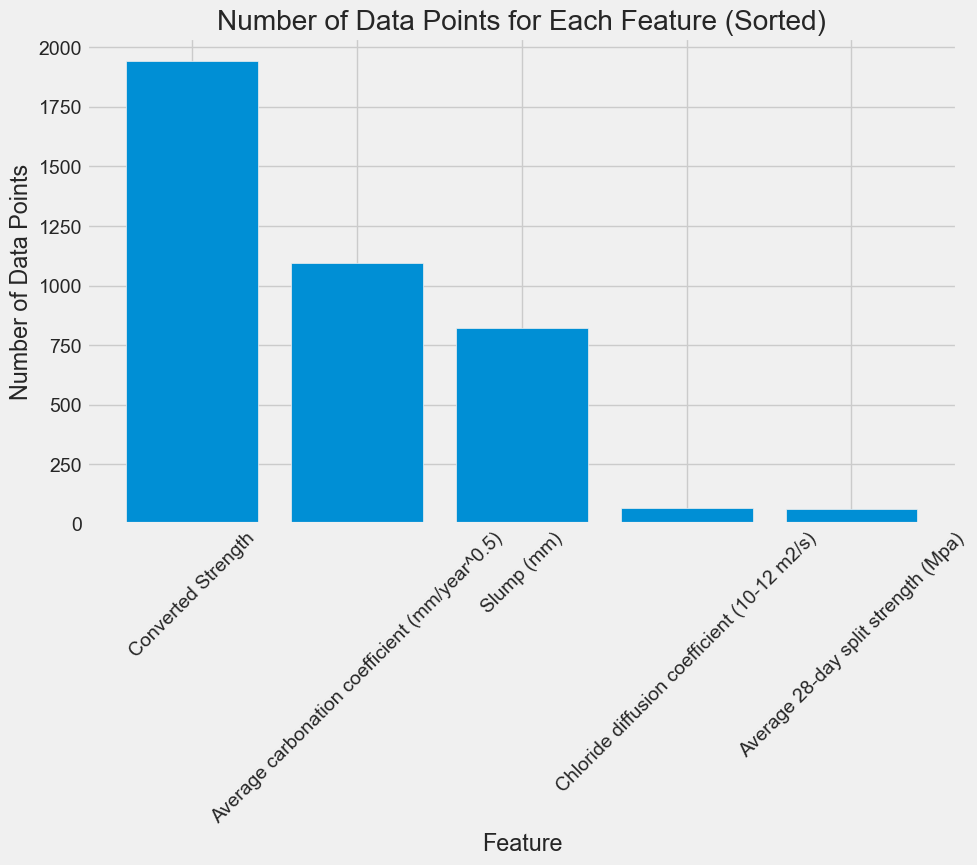

In [11]:
# Subset the DataFrame with the columns of interest
subset_df = semi_df[['Slump (mm)', 'Average 28-day split strength (Mpa)',
                     'Chloride diffusion coefficient (10-12 m2/s)',
                     'Average carbonation coefficient (mm/year^0.5)',
                     'Converted Strength']]

# Calculate the number of data points for each feature
counts = subset_df.count()

# Sort the counts in descending order
sorted_counts = counts.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_counts.index, sorted_counts.values)

# Set plot labels and title
plt.xlabel('Feature')
plt.ylabel('Number of Data Points')
plt.title('Number of Data Points for Each Feature (Sorted)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

# Curing method

In [12]:
missing = semi_df['Curing method'].isnull()
semi_df[missing]

,Data source,ASTM type 1 ordinary Portland Cement content (kg/m^3),CEM I 42.5N ordinary Portland Cement content (kg/m^3),CEM I 52.5N ordinary Portland Cement content (kg/m^3),Class C Fly ash content (kg/m^3),Class F Fly ash content (kg/m^3),Slag content (kg/m^3),Silica fume content (kg/m^3),Water content (kg/m^3),Superplasticizer content (kg/m^3),...,Coarse aggregate content (kg/m^3),Fine aggregate content (kg/m^3),Curing method,Curing temperature (Celsius degree),Curing day,Slump (mm),Average 28-day split strength (Mpa),Chloride diffusion coefficient (10-12 m2/s),Average carbonation coefficient (mm/year^0.5),Converted Strength
1946,"J45. Kayali, 2012",0.0,450.0,0.0,0.0,0.0,0.0,0.0,171.0,5.130,...,1110.0,680.0,NaN,NaN,NaN,65.0,NaN,NaN,NaN,NaN
1947,"J45. Kayali, 2012",0.0,405.0,0.0,0.0,0.0,0.0,45.0,171.0,5.850,...,1101.0,675.0,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN
1948,"J45. Kayali, 2012",0.0,337.5,0.0,0.0,0.0,112.5,0.0,171.0,5.850,...,1105.0,677.0,NaN,NaN,NaN,200.0,NaN,NaN,NaN,NaN
1949,"J45. Kayali, 2012",0.0,292.5,0.0,0.0,0.0,112.5,45.0,171.0,5.895,...,1096.0,672.0,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN
1950,"J45. Kayali, 2012",0.0,225.0,0.0,0.0,0.0,225.0,0.0,171.0,5.400,...,1100.0,674.0,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN
1951,"J45. Kayali, 2012",0.0,180.0,0.0,0.0,0.0,225.0,45.0,171.0,5.850,...,1091.0,669.0,NaN,NaN,NaN,130.0,NaN,NaN,NaN,NaN
1952,"J45. Kayali, 2012",0.0,135.0,0.0,0.0,0.0,315.0,0.0,171.0,4.230,...,1111.0,681.0,NaN,NaN,NaN,155.0,NaN,NaN,NaN,NaN
1953,"J45. Kayali, 2012",0.0,90.0,0.0,0.0,0.0,315.0,45.0,171.0,5.850,...,1102.0,675.0,NaN,NaN,NaN,110.0,NaN,NaN,NaN,NaN


In [13]:
semi_df = semi_df.dropna(subset = ['Curing method'])
new_df = semi_df.copy()
new_df = pd.concat([semi_df, pd.get_dummies(semi_df['Curing method'])], axis=1)
new_df.isnull().sum()

Data source                                                 0
ASTM type 1 ordinary Portland Cement content (kg/m^3)       0
CEM I 42.5N ordinary Portland Cement content (kg/m^3)       0
CEM I 52.5N ordinary Portland Cement content (kg/m^3)       0
Class C Fly ash content (kg/m^3)                            0
Class F Fly ash content (kg/m^3)                            0
Slag content (kg/m^3)                                       0
Silica fume content (kg/m^3)                                0
Water content (kg/m^3)                                      0
Superplasticizer content (kg/m^3)                           0
Maximum coarse aggregate size (mm)                          0
Coarse aggregate content (kg/m^3)                           5
Fine aggregate content (kg/m^3)                             5
Curing method                                               0
Curing temperature (Celsius degree)                         0
Curing day                                                  2
Slump (m

In [14]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 0 to 1987
Data columns (total 25 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Data source                                            1980 non-null   object 
 1   ASTM type 1 ordinary Portland Cement content (kg/m^3)  1980 non-null   float64
 2   CEM I 42.5N ordinary Portland Cement content (kg/m^3)  1980 non-null   float64
 3   CEM I 52.5N ordinary Portland Cement content (kg/m^3)  1980 non-null   float64
 4   Class C Fly ash content (kg/m^3)                       1980 non-null   float64
 5   Class F Fly ash content (kg/m^3)                       1980 non-null   float64
 6   Slag content (kg/m^3)                                  1980 non-null   float64
 7   Silica fume content (kg/m^3)                           1980 non-null   float64
 8   Water content (kg/m^3)                          

In [15]:
new_df = new_df.drop(['Curing method', 'Curing day'], axis= 1)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 0 to 1987
Data columns (total 23 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Data source                                            1980 non-null   object 
 1   ASTM type 1 ordinary Portland Cement content (kg/m^3)  1980 non-null   float64
 2   CEM I 42.5N ordinary Portland Cement content (kg/m^3)  1980 non-null   float64
 3   CEM I 52.5N ordinary Portland Cement content (kg/m^3)  1980 non-null   float64
 4   Class C Fly ash content (kg/m^3)                       1980 non-null   float64
 5   Class F Fly ash content (kg/m^3)                       1980 non-null   float64
 6   Slag content (kg/m^3)                                  1980 non-null   float64
 7   Silica fume content (kg/m^3)                           1980 non-null   float64
 8   Water content (kg/m^3)                          

# Subset without 0

In [16]:
# function to plot a boxplot and a histogram along the same scale.

def hist_boxplot(data, feature, figsize = (12,7),kde = True, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,
        sharex= True,
        gridspec_kw ={'height_ratios': (0.25,0.75)},
        figsize = figsize)
    sns.boxplot(data=data, x =feature, ax = ax_box2, showmeans = True, color = 'violet')

    if bins:
        sns.histplot(data=data, x =feature, kde = kde, ax = ax_hist2, bins=bins, palette = 'winter')

    else:
        sns.histplot(data=data, x =feature, kde = kde, ax = ax_hist2, palette = 'winter')
    ax_hist2.axvline(data[feature].mean(), color = 'green', linestyle = "--")
    ax_hist2.axvline(data[feature].median(), color = 'black', linestyle = "-")

In [17]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [18]:
type_1 = new_df[new_df['ASTM type 1 ordinary Portland Cement content (kg/m^3)'] != 0]
type_1

,Data source,ASTM type 1 ordinary Portland Cement content (kg/m^3),CEM I 42.5N ordinary Portland Cement content (kg/m^3),CEM I 52.5N ordinary Portland Cement content (kg/m^3),Class C Fly ash content (kg/m^3),Class F Fly ash content (kg/m^3),Slag content (kg/m^3),Silica fume content (kg/m^3),Water content (kg/m^3),Superplasticizer content (kg/m^3),...,Curing temperature (Celsius degree),Slump (mm),Average 28-day split strength (Mpa),Chloride diffusion coefficient (10-12 m2/s),Average carbonation coefficient (mm/year^0.5),Converted Strength,Air,Moist,Sealed,Submerged
1167,J3. Ramezanianpour 1995,372.0,0.0,0.0,0.0,0.0,0.0,0.0,186.0,0.0,...,20.0,130.0,NaN,NaN,NaN,47.553,0,1,0,0
1168,J3. Ramezanianpour 1995,280.0,0.0,0.0,0.0,0.0,92.0,0.0,186.0,0.0,...,20.0,140.0,NaN,NaN,NaN,49.731,0,1,0,0
1169,J3. Ramezanianpour 1995,186.0,0.0,0.0,0.0,0.0,186.0,0.0,186.0,0.0,...,20.0,165.0,NaN,NaN,NaN,42.713,0,1,0,0
1170,J3. Ramezanianpour 1995,280.0,0.0,0.0,0.0,92.0,0.0,0.0,186.0,0.0,...,20.0,215.0,NaN,NaN,NaN,38.115,0,1,0,0
1171,J3. Ramezanianpour 1995,156.0,0.0,0.0,0.0,216.0,0.0,0.0,130.0,3.6,...,20.0,120.0,NaN,NaN,NaN,38.841,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,"J48. Farahani, 2015",350.0,0.0,0.0,0.0,0.0,0.0,50.0,180.0,2.0,...,21.0,NaN,NaN,1.550,NaN,NaN,0,0,0,1
1984,"J48. Farahani, 2015",380.0,0.0,0.0,0.0,0.0,0.0,20.0,200.0,0.8,...,21.0,NaN,NaN,3.375,NaN,NaN,0,0,0,1
1985,"J48. Farahani, 2015",370.0,0.0,0.0,0.0,0.0,0.0,30.0,200.0,1.2,...,21.0,NaN,NaN,1.000,NaN,NaN,0,0,0,1
1986,"J48. Farahani, 2015",360.0,0.0,0.0,0.0,0.0,0.0,40.0,200.0,1.8,...,21.0,NaN,NaN,0.500,NaN,NaN,0,0,0,1


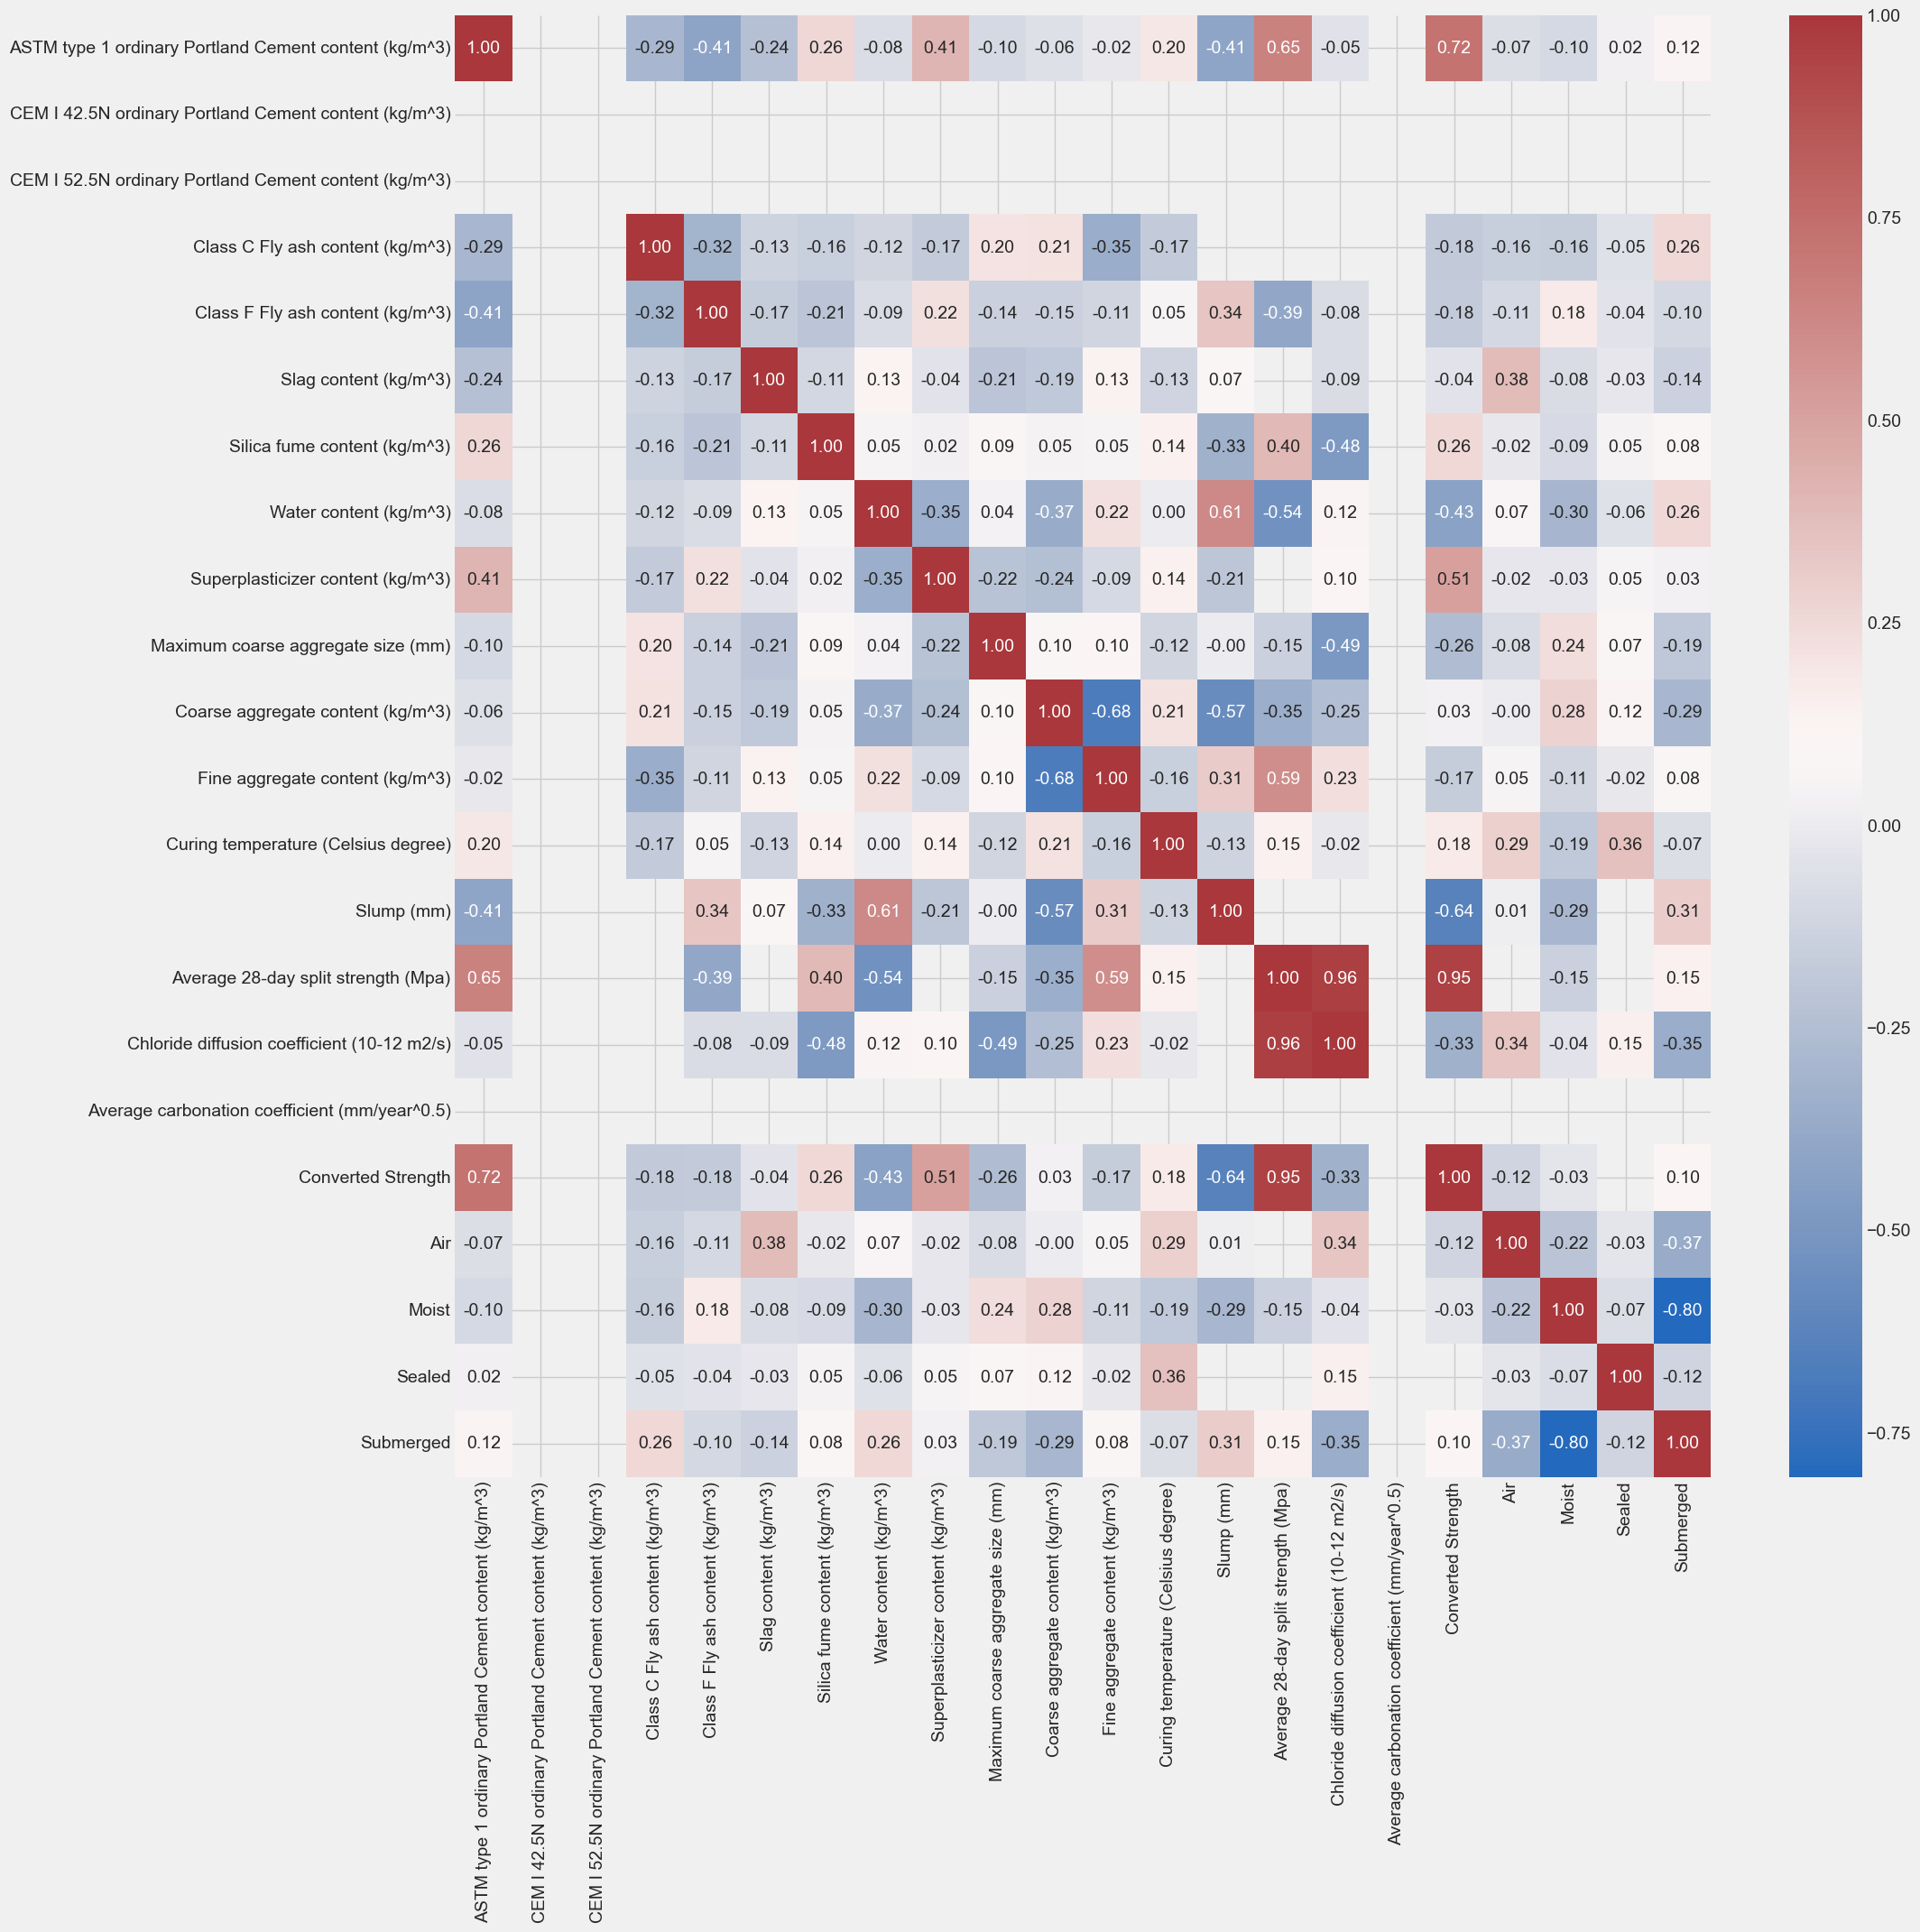

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(type_1.corr(), annot = True, fmt='.2f', cmap = 'vlag')
plt.show()

<Axes: >

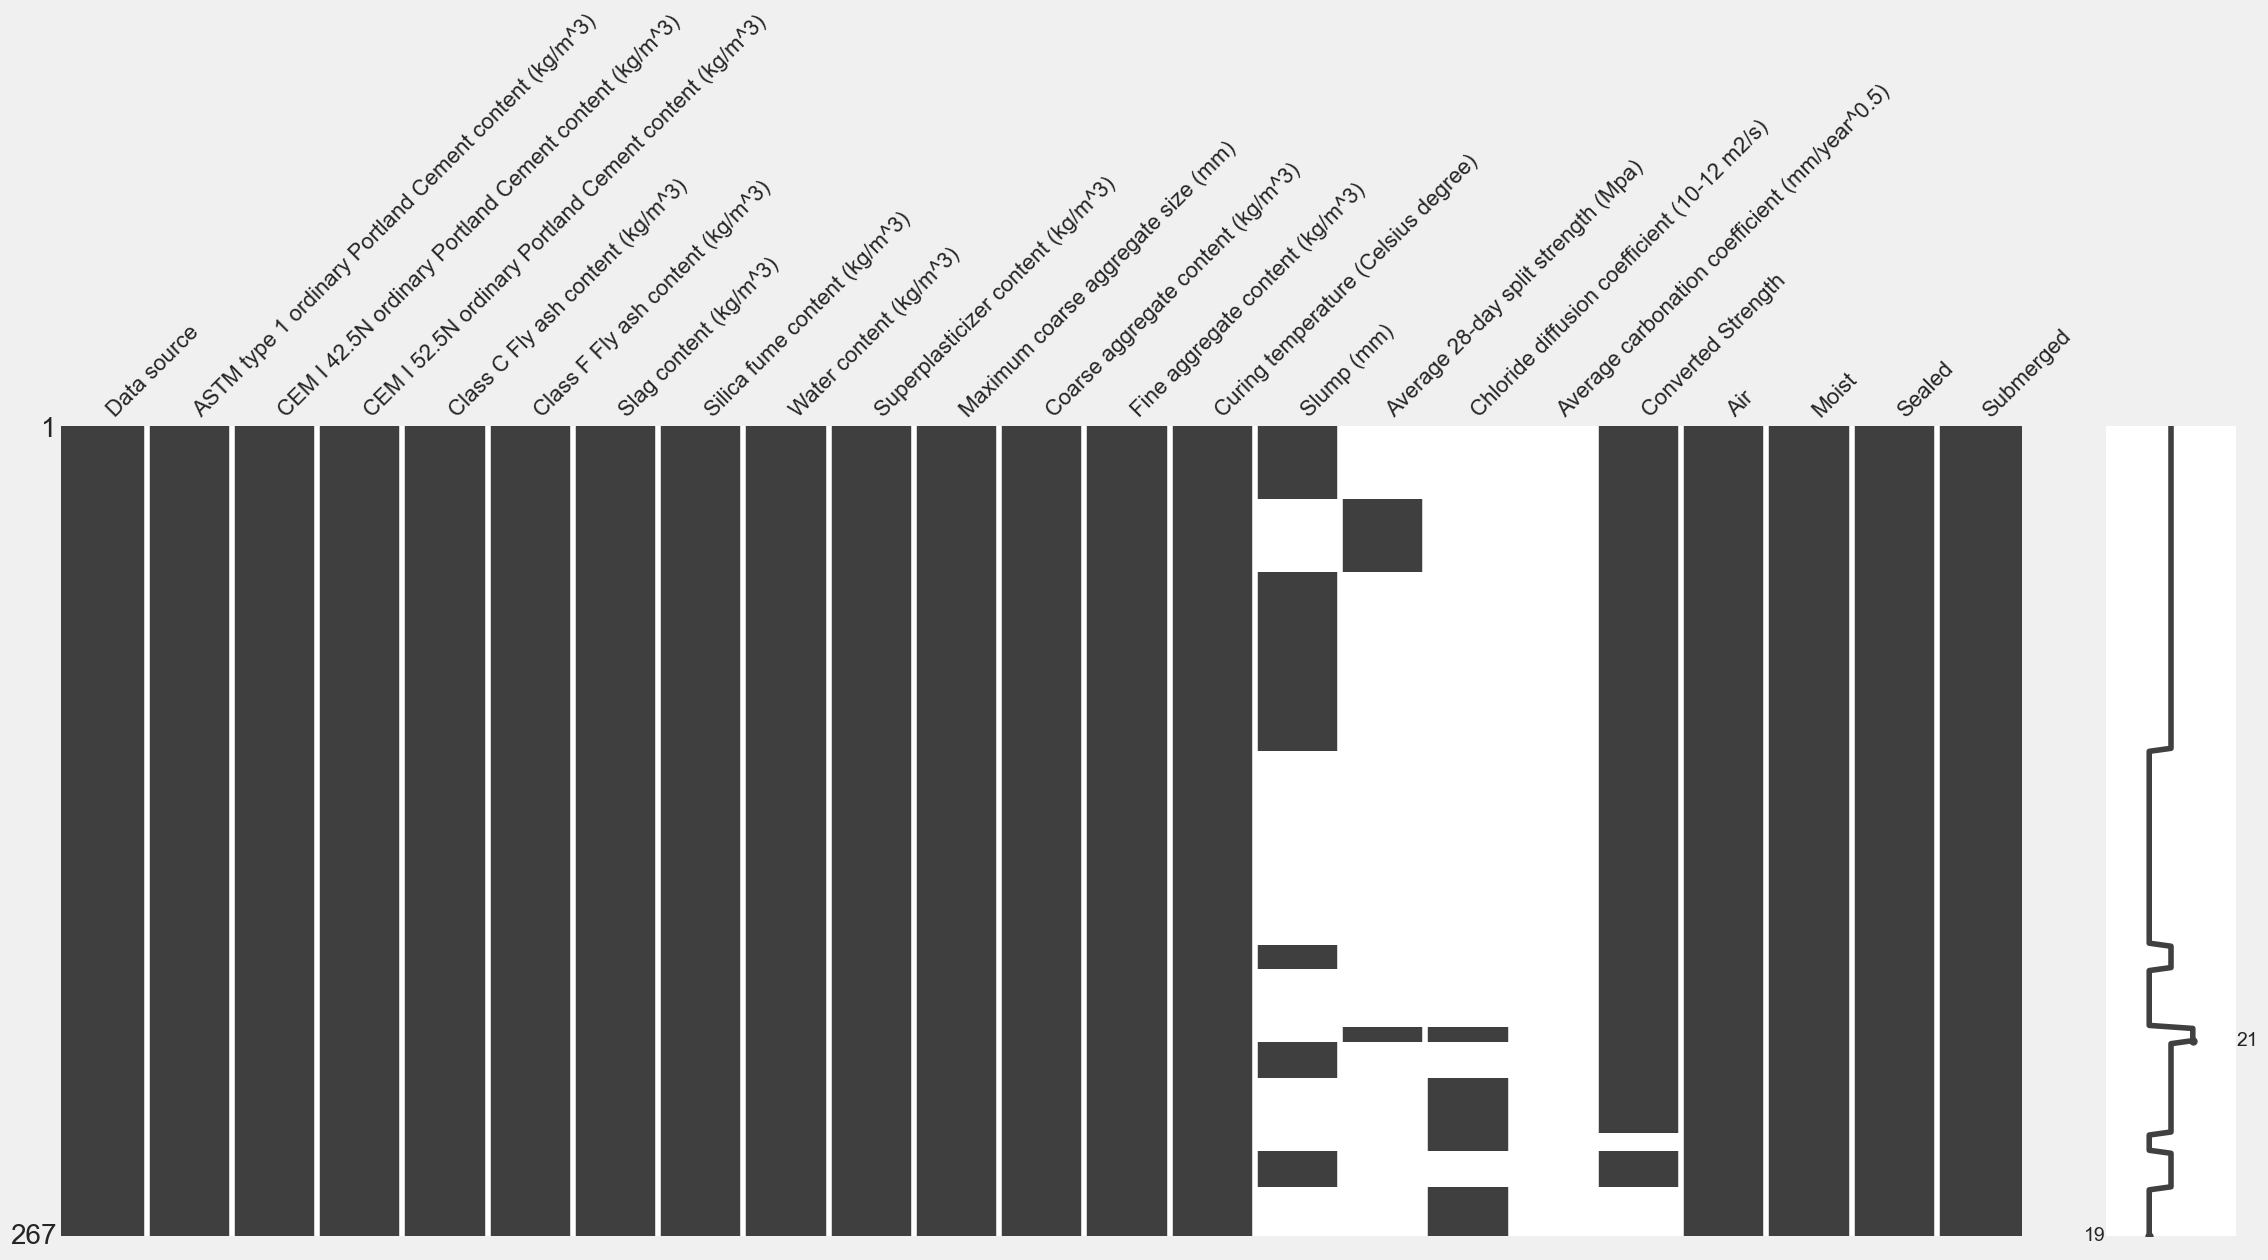

In [20]:
msno.matrix(type_1)

267
670
1039
113
608
490
291


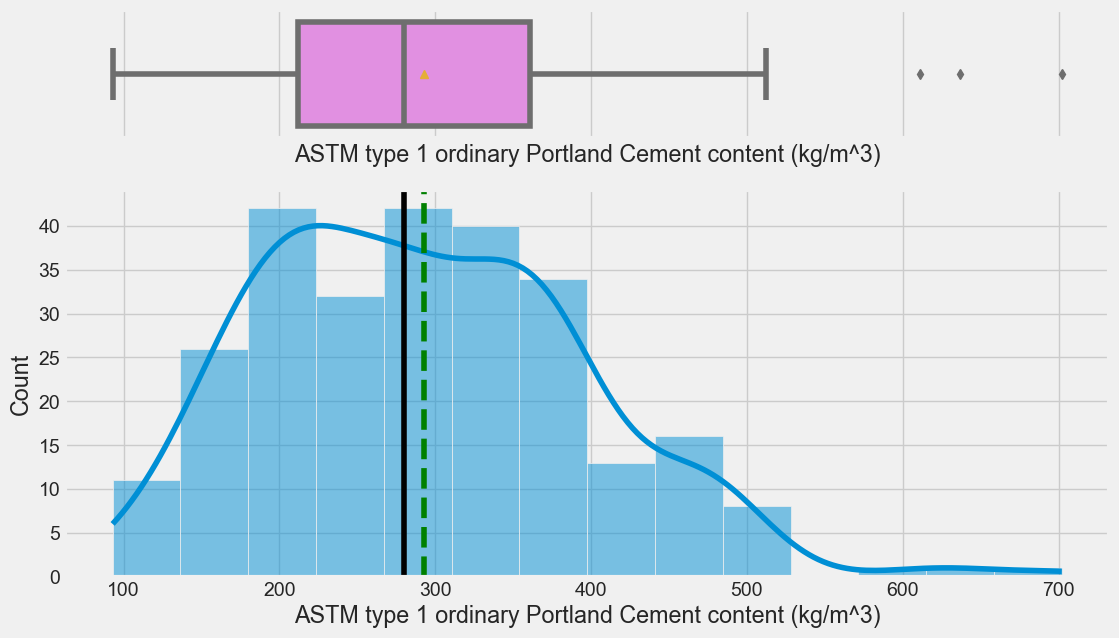

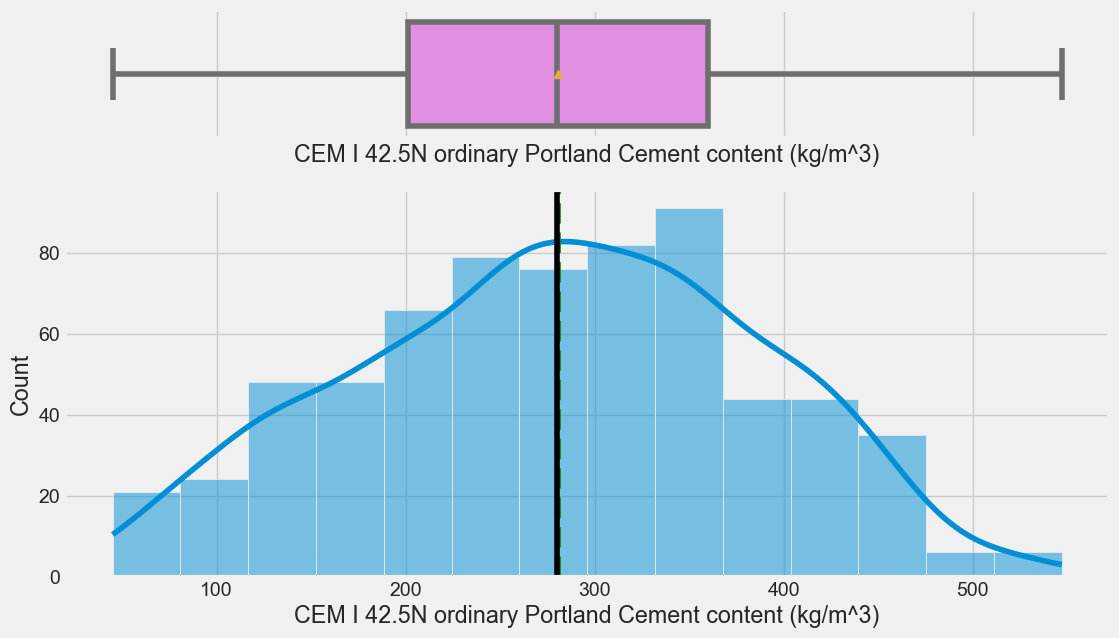

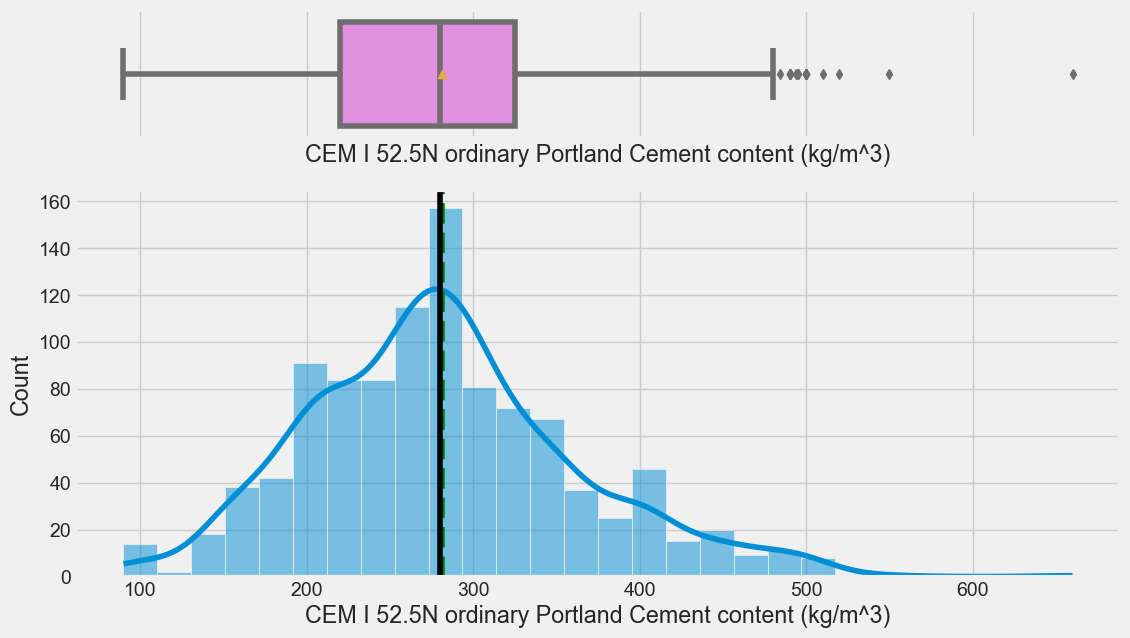

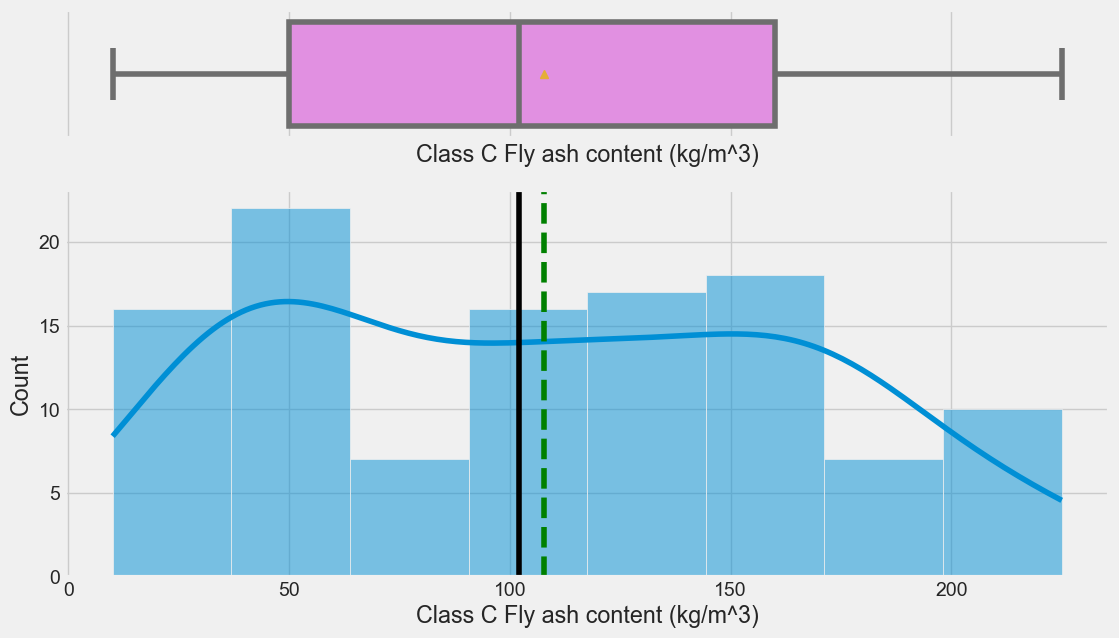

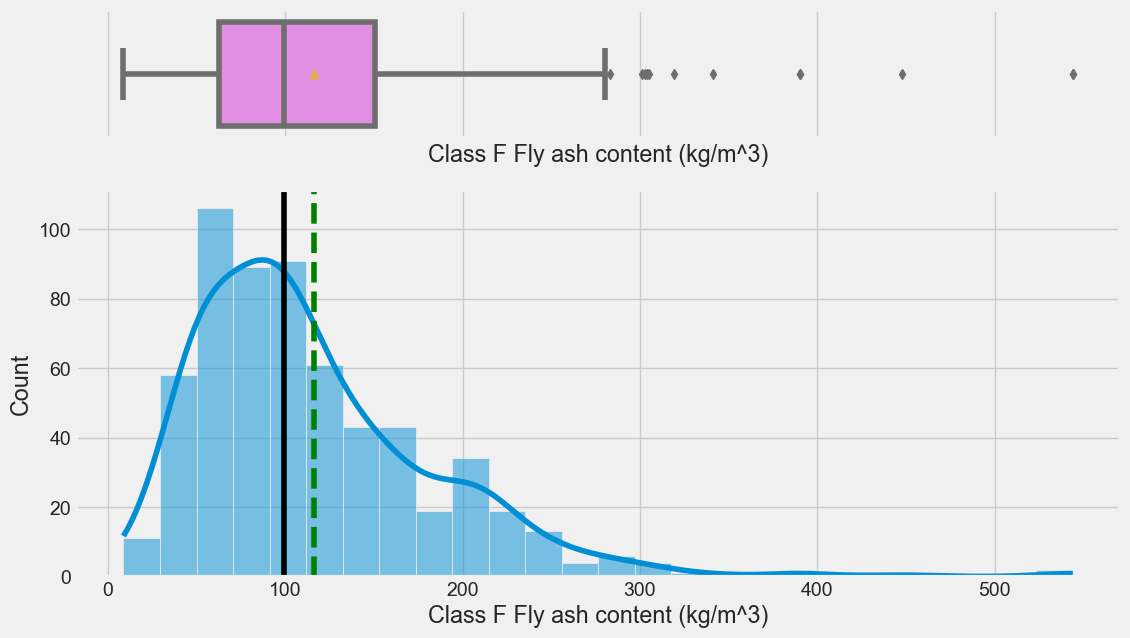

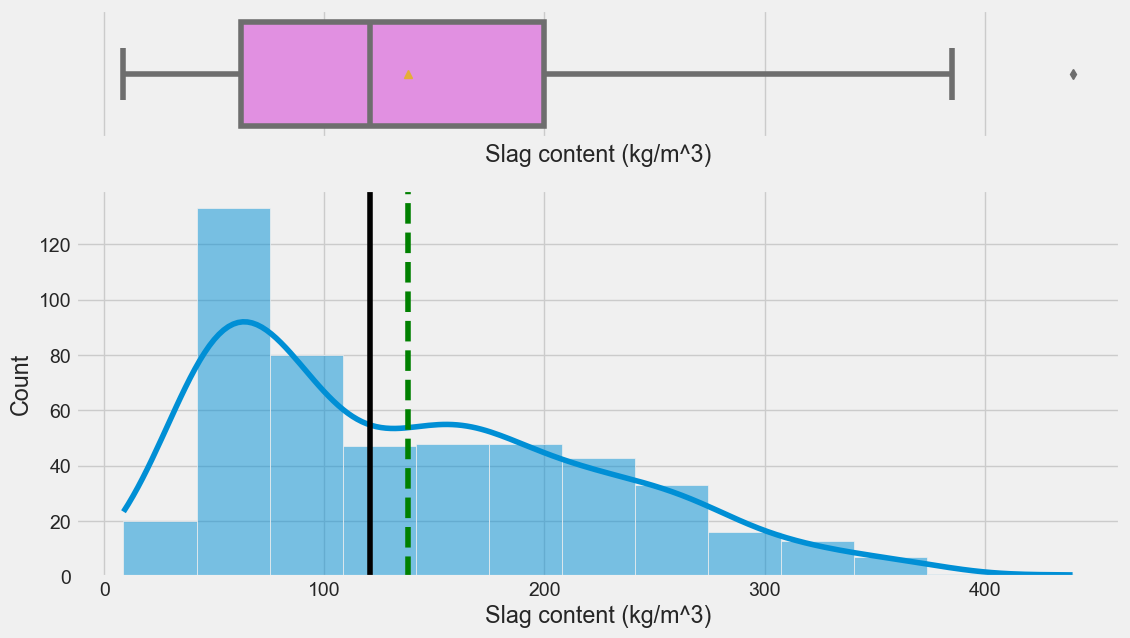

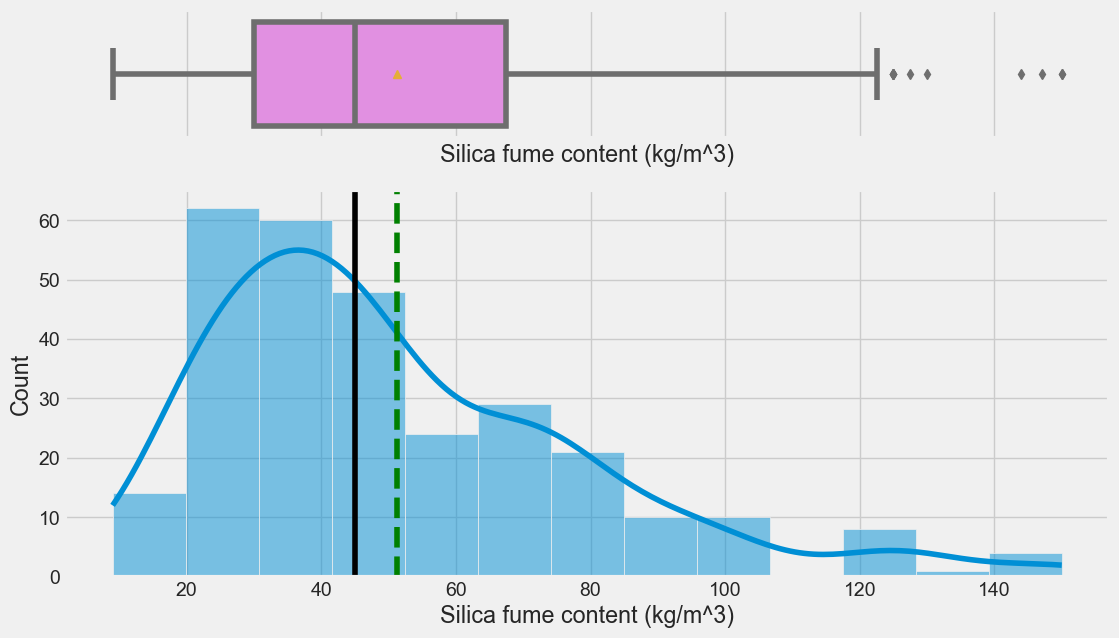

In [21]:
col_list = ['ASTM type 1 ordinary Portland Cement content (kg/m^3)',
            'CEM I 42.5N ordinary Portland Cement content (kg/m^3)',
            'CEM I 52.5N ordinary Portland Cement content (kg/m^3)',
            'Class C Fly ash content (kg/m^3)',
            'Class F Fly ash content (kg/m^3)',
            'Slag content (kg/m^3)',
            'Silica fume content (kg/m^3)']

for col in col_list:
    if col in new_df.columns:
        non_zero_df = new_df[new_df[col] != 0]
        hist_boxplot(non_zero_df, col)
        print(non_zero_df.shape[0])

In [22]:
DF = new_df.replace(0,np.nan)
DF

,Data source,ASTM type 1 ordinary Portland Cement content (kg/m^3),CEM I 42.5N ordinary Portland Cement content (kg/m^3),CEM I 52.5N ordinary Portland Cement content (kg/m^3),Class C Fly ash content (kg/m^3),Class F Fly ash content (kg/m^3),Slag content (kg/m^3),Silica fume content (kg/m^3),Water content (kg/m^3),Superplasticizer content (kg/m^3),...,Curing temperature (Celsius degree),Slump (mm),Average 28-day split strength (Mpa),Chloride diffusion coefficient (10-12 m2/s),Average carbonation coefficient (mm/year^0.5),Converted Strength,Air,Moist,Sealed,Submerged
0,2. Yunusa 2014,NaN,NaN,450.0,NaN,NaN,NaN,NaN,180.0,4.00,...,20.0,30.0,NaN,NaN,3.139,75.93,NaN,NaN,NaN,1.0
1,2. Yunusa 2014,NaN,NaN,400.0,NaN,NaN,NaN,NaN,200.0,3.25,...,20.0,60.0,NaN,NaN,4.022,64.50,NaN,NaN,NaN,1.0
2,2. Yunusa 2014,NaN,NaN,350.0,NaN,NaN,NaN,NaN,210.0,NaN,...,20.0,100.0,NaN,NaN,6.670,49.23,NaN,NaN,NaN,1.0
3,2. Yunusa 2014,NaN,NaN,300.0,NaN,NaN,NaN,NaN,225.0,NaN,...,20.0,140.0,NaN,NaN,7.945,36.00,NaN,NaN,NaN,1.0
4,2. Yunusa 2014,NaN,NaN,315.0,NaN,135.0,NaN,NaN,180.0,1.75,...,20.0,40.0,NaN,NaN,6.052,62.80,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,"J48. Farahani, 2015",350.0,NaN,NaN,NaN,NaN,NaN,50.0,180.0,2.00,...,21.0,NaN,NaN,1.550,NaN,NaN,NaN,NaN,NaN,1.0
1984,"J48. Farahani, 2015",380.0,NaN,NaN,NaN,NaN,NaN,20.0,200.0,0.80,...,21.0,NaN,NaN,3.375,NaN,NaN,NaN,NaN,NaN,1.0
1985,"J48. Farahani, 2015",370.0,NaN,NaN,NaN,NaN,NaN,30.0,200.0,1.20,...,21.0,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,1.0
1986,"J48. Farahani, 2015",360.0,NaN,NaN,NaN,NaN,NaN,40.0,200.0,1.80,...,21.0,NaN,NaN,0.500,NaN,NaN,NaN,NaN,NaN,1.0


<Axes: >

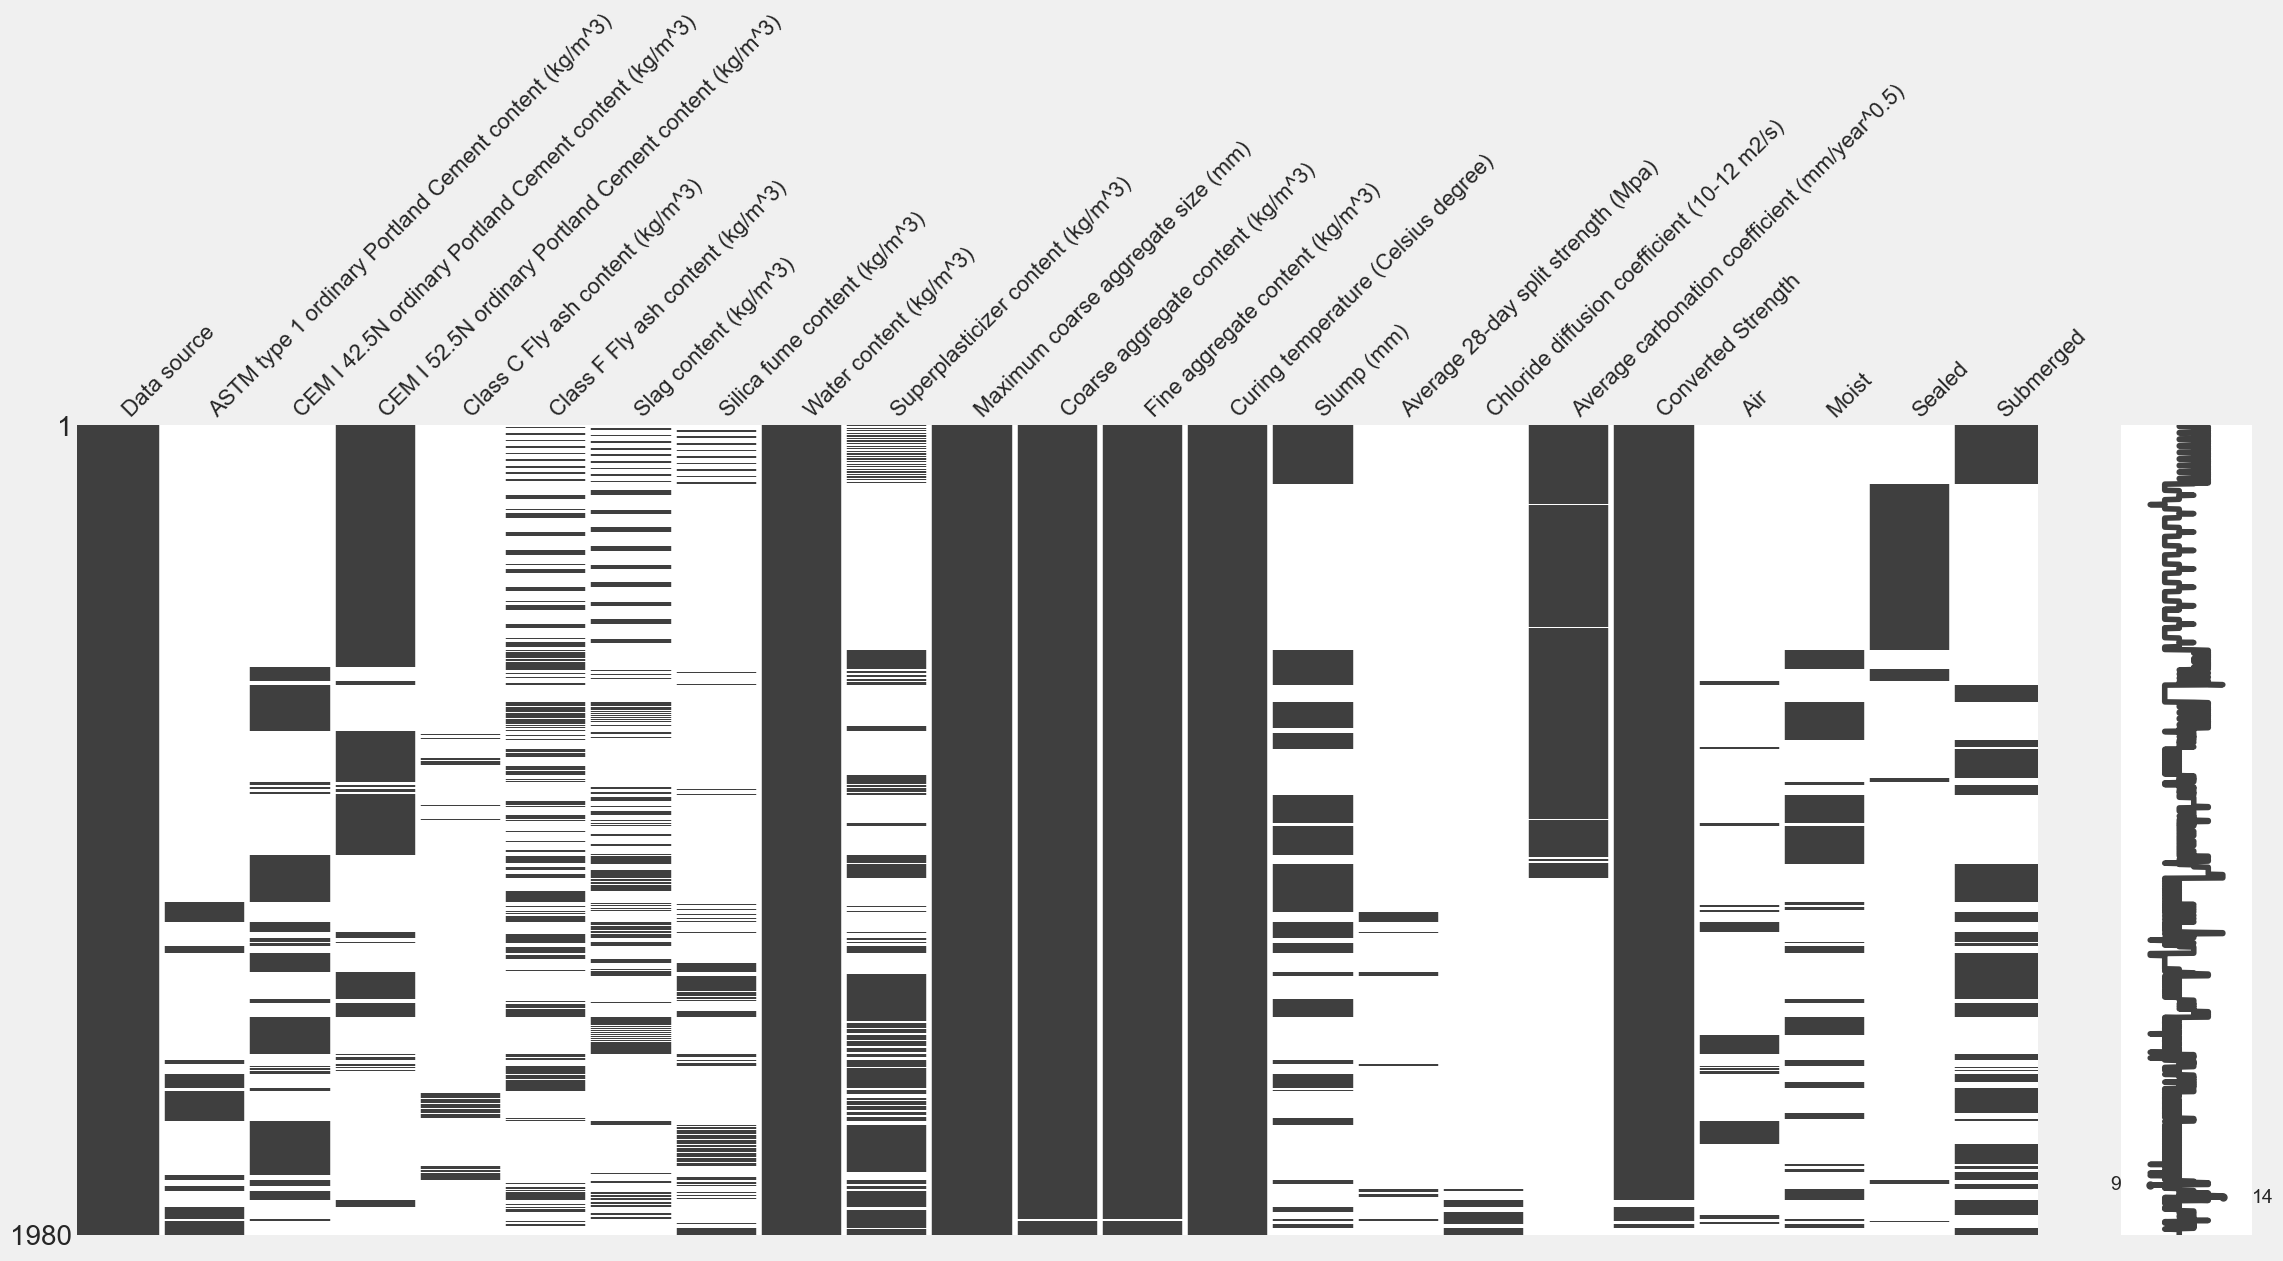

In [23]:
msno.matrix(DF)

In [24]:
DF[(DF['CEM I 42.5N ordinary Portland Cement content (kg/m^3)'] >= 0) & (DF['CEM I 52.5N ordinary Portland Cement content (kg/m^3)'] >=0)]

,Data source,ASTM type 1 ordinary Portland Cement content (kg/m^3),CEM I 42.5N ordinary Portland Cement content (kg/m^3),CEM I 52.5N ordinary Portland Cement content (kg/m^3),Class C Fly ash content (kg/m^3),Class F Fly ash content (kg/m^3),Slag content (kg/m^3),Silica fume content (kg/m^3),Water content (kg/m^3),Superplasticizer content (kg/m^3),...,Curing temperature (Celsius degree),Slump (mm),Average 28-day split strength (Mpa),Chloride diffusion coefficient (10-12 m2/s),Average carbonation coefficient (mm/year^0.5),Converted Strength,Air,Moist,Sealed,Submerged


In [25]:
DF[(DF['CEM I 42.5N ordinary Portland Cement content (kg/m^3)'] >= 0) & (DF['ASTM type 1 ordinary Portland Cement content (kg/m^3)'] >=0)]

,Data source,ASTM type 1 ordinary Portland Cement content (kg/m^3),CEM I 42.5N ordinary Portland Cement content (kg/m^3),CEM I 52.5N ordinary Portland Cement content (kg/m^3),Class C Fly ash content (kg/m^3),Class F Fly ash content (kg/m^3),Slag content (kg/m^3),Silica fume content (kg/m^3),Water content (kg/m^3),Superplasticizer content (kg/m^3),...,Curing temperature (Celsius degree),Slump (mm),Average 28-day split strength (Mpa),Chloride diffusion coefficient (10-12 m2/s),Average carbonation coefficient (mm/year^0.5),Converted Strength,Air,Moist,Sealed,Submerged


In [26]:
DF[(DF['CEM I 52.5N ordinary Portland Cement content (kg/m^3)'] >= 0) & (DF['ASTM type 1 ordinary Portland Cement content (kg/m^3)'] >=0)]

,Data source,ASTM type 1 ordinary Portland Cement content (kg/m^3),CEM I 42.5N ordinary Portland Cement content (kg/m^3),CEM I 52.5N ordinary Portland Cement content (kg/m^3),Class C Fly ash content (kg/m^3),Class F Fly ash content (kg/m^3),Slag content (kg/m^3),Silica fume content (kg/m^3),Water content (kg/m^3),Superplasticizer content (kg/m^3),...,Curing temperature (Celsius degree),Slump (mm),Average 28-day split strength (Mpa),Chloride diffusion coefficient (10-12 m2/s),Average carbonation coefficient (mm/year^0.5),Converted Strength,Air,Moist,Sealed,Submerged


In [27]:
DF[(DF['Class F Fly ash content (kg/m^3)'] >= 0) & (DF['Slag content (kg/m^3)'] >=0)]

,Data source,ASTM type 1 ordinary Portland Cement content (kg/m^3),CEM I 42.5N ordinary Portland Cement content (kg/m^3),CEM I 52.5N ordinary Portland Cement content (kg/m^3),Class C Fly ash content (kg/m^3),Class F Fly ash content (kg/m^3),Slag content (kg/m^3),Silica fume content (kg/m^3),Water content (kg/m^3),Superplasticizer content (kg/m^3),...,Curing temperature (Celsius degree),Slump (mm),Average 28-day split strength (Mpa),Chloride diffusion coefficient (10-12 m2/s),Average carbonation coefficient (mm/year^0.5),Converted Strength,Air,Moist,Sealed,Submerged
171,1. Vu 2019,NaN,NaN,186.0,NaN,62.00,62.0,NaN,155.0,NaN,...,20.0,NaN,NaN,NaN,7.253732,58.714286,NaN,NaN,1.0,NaN
216,1. Vu 2019,NaN,NaN,186.0,NaN,62.00,62.0,NaN,155.0,NaN,...,20.0,NaN,NaN,NaN,2.592259,58.714286,NaN,NaN,1.0,NaN
261,1. Vu 2019,NaN,NaN,186.0,NaN,62.00,62.0,NaN,155.0,NaN,...,20.0,NaN,NaN,NaN,4.597030,58.714286,NaN,NaN,1.0,NaN
306,1. Vu 2019,NaN,NaN,186.0,NaN,62.00,62.0,NaN,155.0,NaN,...,20.0,NaN,NaN,NaN,2.703876,58.714286,NaN,NaN,1.0,NaN
351,1. Vu 2019,NaN,NaN,186.0,NaN,62.00,62.0,NaN,155.0,NaN,...,20.0,NaN,NaN,NaN,4.174500,58.714286,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1886,"J40. Guo, 2020",NaN,130.0,NaN,NaN,156.00,156.0,78.0,182.0,7.57,...,20.0,NaN,2.89,NaN,NaN,42.750000,NaN,1.0,NaN,NaN
1889,"J40. Guo, 2020",NaN,113.7,NaN,NaN,170.63,170.6,NaN,182.0,1.37,...,20.0,NaN,NaN,NaN,NaN,18.350000,NaN,1.0,NaN,NaN
1890,"J40. Guo, 2020",NaN,113.7,NaN,NaN,136.50,136.5,68.3,182.0,3.19,...,20.0,NaN,NaN,NaN,NaN,26.230000,NaN,1.0,NaN,NaN
1893,"J40. Guo, 2020",NaN,101.0,NaN,NaN,151.50,151.5,NaN,182.0,1.21,...,20.0,NaN,NaN,NaN,NaN,12.070000,NaN,1.0,NaN,NaN


# Normality test

## Shapiro-Wilk Test

In [28]:
from scipy.stats import shapiro

alpha = 0.05

for col in col_list:
    if col in new_df.columns:
        non_zero_df = new_df[new_df[col] != 0]
        stat, p = shapiro(non_zero_df[col])
        if p > alpha:
            print(f'{col} looks Gaussian (fail to reject H0)')
        else:
            print(f'{col} does not look Gaussian (reject H0)')

ASTM type 1 ordinary Portland Cement content (kg/m^3) does not look Gaussian (reject H0)
CEM I 42.5N ordinary Portland Cement content (kg/m^3) does not look Gaussian (reject H0)
CEM I 52.5N ordinary Portland Cement content (kg/m^3) does not look Gaussian (reject H0)
Class C Fly ash content (kg/m^3) does not look Gaussian (reject H0)
Class F Fly ash content (kg/m^3) does not look Gaussian (reject H0)
Slag content (kg/m^3) does not look Gaussian (reject H0)
Silica fume content (kg/m^3) does not look Gaussian (reject H0)


In [29]:
stat, p = shapiro(new_df['Converted Strength'])
if p > alpha:
    print('Converted Strength looks Gaussian (fail to reject H0)')
else:
    print('Converted Strength does not look Gaussian (reject H0)')

Converted Strength looks Gaussian (fail to reject H0)


## QQplot

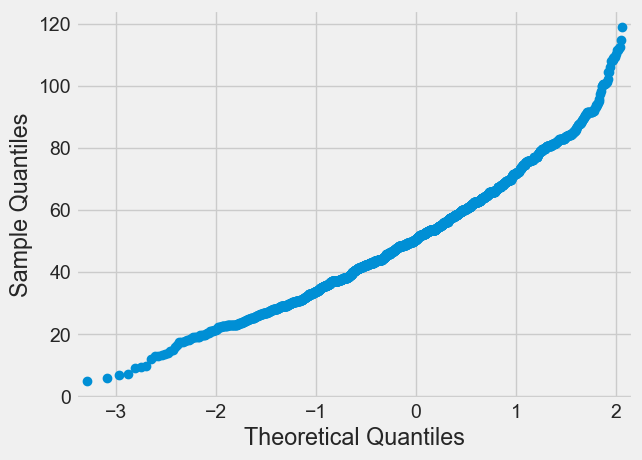

In [30]:
from statsmodels.graphics.gofplots import qqplot
qqplot(new_df['Converted Strength'], line='s')
plt.show()

## Anderson-Darling Test

In [31]:
from scipy.stats import anderson

result = anderson(new_df['Converted Strength'], dist= 'norm')
print('Statistic: %.3f' % result.statistic)
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: nan
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.785, data does not look normal (reject H0)
2.500: 0.916, data does not look normal (reject H0)
1.000: 1.090, data does not look normal (reject H0)


# Gaussian Process

## Chloride

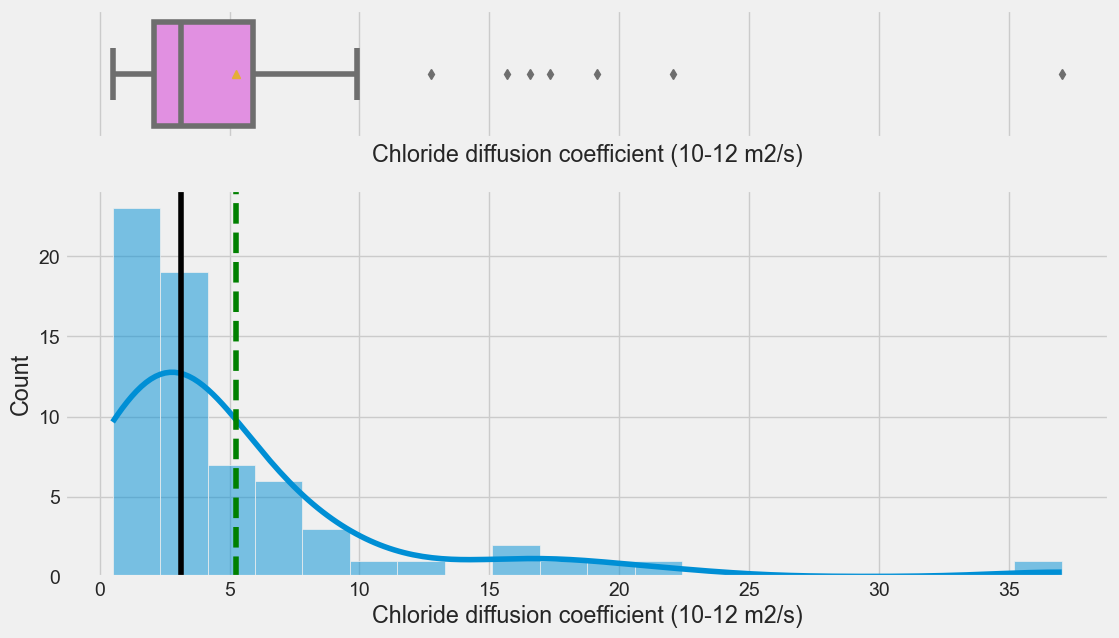

In [32]:
hist_boxplot(new_df, 'Chloride diffusion coefficient (10-12 m2/s)')

In [33]:
chloride = new_df.drop(['Slump (mm)', 'Converted Strength', 'Slump (mm)', 'Average 28-day split strength (Mpa)', 'Average carbonation coefficient (mm/year^0.5)', 'Data source'], axis= 1)
chloride

,ASTM type 1 ordinary Portland Cement content (kg/m^3),CEM I 42.5N ordinary Portland Cement content (kg/m^3),CEM I 52.5N ordinary Portland Cement content (kg/m^3),Class C Fly ash content (kg/m^3),Class F Fly ash content (kg/m^3),Slag content (kg/m^3),Silica fume content (kg/m^3),Water content (kg/m^3),Superplasticizer content (kg/m^3),Maximum coarse aggregate size (mm),Coarse aggregate content (kg/m^3),Fine aggregate content (kg/m^3),Curing temperature (Celsius degree),Chloride diffusion coefficient (10-12 m2/s),Air,Moist,Sealed,Submerged
0,0.0,0.0,450.0,0.0,0.0,0.0,0.0,180.0,4.00,20.0,990.0,800.0,20.0,NaN,0,0,0,1
1,0.0,0.0,400.0,0.0,0.0,0.0,0.0,200.0,3.25,20.0,990.0,877.0,20.0,NaN,0,0,0,1
2,0.0,0.0,350.0,0.0,0.0,0.0,0.0,210.0,0.00,20.0,1015.0,869.0,20.0,NaN,0,0,0,1
3,0.0,0.0,300.0,0.0,0.0,0.0,0.0,225.0,0.00,20.0,1050.0,810.0,20.0,NaN,0,0,0,1
4,0.0,0.0,315.0,0.0,135.0,0.0,0.0,180.0,1.75,20.0,990.0,800.0,20.0,NaN,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,350.0,0.0,0.0,0.0,0.0,0.0,50.0,180.0,2.00,20.0,983.0,806.0,21.0,1.550,0,0,0,1
1984,380.0,0.0,0.0,0.0,0.0,0.0,20.0,200.0,0.80,20.0,991.0,793.0,21.0,3.375,0,0,0,1
1985,370.0,0.0,0.0,0.0,0.0,0.0,30.0,200.0,1.20,20.0,959.0,784.0,21.0,1.000,0,0,0,1
1986,360.0,0.0,0.0,0.0,0.0,0.0,40.0,200.0,1.80,20.0,1020.0,820.0,21.0,0.500,0,0,0,1


In [28]:
#chloride = new_df.drop(['Slump (mm)', 'Chloride diffusion coefficient (10-12 m2/s)', 'Slump (mm)', 'Average 28-day split strength (Mpa)', 'Average carbonation coefficient (mm/year^0.5)', 'Data source'], axis= 1)
#chloride # Strength

In [34]:
chloride = chloride.dropna()

x_chl = chloride.drop('Chloride diffusion coefficient (10-12 m2/s)', axis=1) # Converted Strength
y_chl = chloride['Chloride diffusion coefficient (10-12 m2/s)']
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(x_chl, y_chl, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
# Define and train Gaussian Process Regression model
kernel = 1.0 * RBF(length_scale=1.0)
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=100, random_state=42)
gpr.fit(X_train, y_train)

# Generate new data points
# For example, let's generate 10 new data points
new_data_points = np.random.rand(4000, x_chl.shape[1])  # Generate random feature values
predictions, std_dev = gpr.predict(new_data_points, return_std=True)  # Predictions and uncertainty

In [31]:
y_pred = gpr.predict(X_test)

# Compute regression metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 17.098092215026565
R-squared (R2) Score: 0.25868525488861915
Mean Absolute Error (MAE): 2.6114340553889925


In [32]:
y_pred

array([ 4.54075584,  2.30278133,  1.9974897 , 31.72571836,  1.39235805,
        1.15357595, 11.53231319,  3.27340693,  1.00171363,  4.28672545,
        3.57640576,  1.36117348,  2.08087965])

In [33]:
generated_data = pd.DataFrame(new_data_points, columns=x_chl.columns)
generated_data['Predicted_Chloride'] = predictions
generated_data['Standard_Deviation'] = std_dev

generated_data

,ASTM type 1 ordinary Portland Cement content (kg/m^3),CEM I 42.5N ordinary Portland Cement content (kg/m^3),CEM I 52.5N ordinary Portland Cement content (kg/m^3),Class C Fly ash content (kg/m^3),Class F Fly ash content (kg/m^3),Slag content (kg/m^3),Silica fume content (kg/m^3),Water content (kg/m^3),Superplasticizer content (kg/m^3),Maximum coarse aggregate size (mm),Coarse aggregate content (kg/m^3),Fine aggregate content (kg/m^3),Curing temperature (Celsius degree),Air,Moist,Sealed,Submerged,Predicted_Chloride,Standard_Deviation
0,0.234614,0.669620,0.616116,0.506823,0.542617,0.146323,0.204874,0.254031,0.287393,0.693372,0.121713,0.350018,0.594730,0.323973,0.525865,0.917598,0.750519,0.321100,8.479937
1,0.563884,0.817819,0.790156,0.562735,0.847813,0.427462,0.905935,0.884604,0.309225,0.271836,0.414670,0.434454,0.590669,0.769826,0.870054,0.821800,0.483429,0.115753,8.495505
2,0.131448,0.372593,0.571777,0.010285,0.846791,0.678346,0.788429,0.838283,0.777971,0.397249,0.523910,0.202807,0.154470,0.377752,0.085287,0.897691,0.277397,0.226753,8.489021
3,0.180785,0.769818,0.661101,0.272835,0.966552,0.533738,0.586018,0.973253,0.434072,0.414695,0.335962,0.156367,0.399302,0.773739,0.626212,0.656940,0.809731,0.165884,8.494410
4,0.897539,0.616149,0.979095,0.228328,0.912853,0.881787,0.580972,0.033220,0.594971,0.860634,0.586004,0.202757,0.365709,0.997224,0.640137,0.249469,0.022956,0.092780,8.497782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.841396,0.369500,0.642944,0.334492,0.730307,0.044076,0.639956,0.356500,0.113919,0.790472,0.653978,0.821242,0.645027,0.547559,0.754358,0.941784,0.648763,0.204476,8.484478
3996,0.534372,0.165295,0.930013,0.875969,0.163657,0.929013,0.953527,0.942927,0.316889,0.507641,0.268006,0.411709,0.779210,0.934471,0.624958,0.228130,0.871032,0.107693,8.494657
3997,0.959864,0.214826,0.039668,0.862645,0.928259,0.932916,0.245725,0.953631,0.341414,0.917444,0.261883,0.346350,0.071111,0.453050,0.486588,0.245568,0.897836,0.239277,8.486064
3998,0.220150,0.520987,0.667439,0.417436,0.228879,0.299068,0.873939,0.741592,0.591622,0.818575,0.901303,0.902660,0.352031,0.150477,0.604281,0.223548,0.606558,0.288408,8.471575


In [34]:
# Define the GPR model
gpr = GaussianProcessRegressor()

# Define the parameter grid to search
param_grid = {
    'kernel': [1.0 * RBF(length_scale=1.0),  # Default RBF kernel
               1.0 * RBF(length_scale=0.5),  # Smaller length scale
               1.0 * RBF(length_scale=0.2),
               1.0 * RBF(length_scale=0.1)
               ],
    'alpha': [1e-10, 1e-5, 1e-3],  # Noise level values to try
}

# Perform grid search cross-validation
grid_search = GridSearchCV(gpr, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_gpr_model = grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred = best_gpr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(grid_search.best_params_)
print("Best Model Mean Squared Error (MSE):", mse)
print("Best Model R-squared (R2) Score:", r2)
print("Best Model Mean Absolute Error (MAE):", mae)

{'alpha': 0.001, 'kernel': 1**2 * RBF(length_scale=0.5)}
Best Model Mean Squared Error (MSE): 17.039790103552253
Best Model R-squared (R2) Score: 0.2612130348516405
Best Model Mean Absolute Error (MAE): 2.6074554194939004


# Try different kernels

In [35]:
from sklearn.gaussian_process.kernels import Matern, Exponentiation, RationalQuadratic

kernel_functions = [
    Matern(length_scale=1.0, nu=1.5),  # Matern kernel with nu=1.5
    Matern(length_scale=1.0, nu=2.5),  # Matern kernel with nu=2.5
    Exponentiation(1.0 * RBF(length_scale=1.0), 2.0),  # Squared RBF kernel
    RationalQuadratic(length_scale=1.0, alpha=0.1),  # Rational Quadratic kernel
]

for kernel_func in kernel_functions:
    gpr = GaussianProcessRegressor(kernel=kernel_func,n_restarts_optimizer=1000, alpha=1e-10, random_state=42)
    gpr.fit(X_train, y_train)
    y_pred = gpr.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print("Kernel Function:", kernel_func)
    print("Mean Squared Error (MSE):", mse)
    print("R-squared (R2) Score:", r2)
    print("Mean Absolute Error (MAE):", mae)
    print()

Kernel Function: Matern(length_scale=1, nu=1.5)
Mean Squared Error (MSE): 17.381774700989048
R-squared (R2) Score: 0.24638575345131708
Mean Absolute Error (MAE): 2.9726846761018604
Kernel Function: Matern(length_scale=1, nu=2.5)
Mean Squared Error (MSE): 18.840447607806446
R-squared (R2) Score: 0.18314268980893655
Mean Absolute Error (MAE): 3.0734684890257062
Kernel Function: 1**2 * RBF(length_scale=1) ** 2.0
Mean Squared Error (MSE): 17.09809393394799
R-squared (R2) Score: 0.25868518036207067
Mean Absolute Error (MAE): 2.61143417190835
Kernel Function: RationalQuadratic(alpha=0.1, length_scale=1)
Mean Squared Error (MSE): 11.00235431379422
R-squared (R2) Score: 0.5229755822355768
Mean Absolute Error (MAE): 2.4523629952241284


In [37]:
# Define the parameter grid to search
param_grid = {
    'kernel': [
        Matern(length_scale=1.0, nu=1.5),  # Matern kernel with nu=1.5
        Matern(length_scale=1.0, nu=2.5),  # Matern kernel with nu=2.5
        Exponentiation(1.0 * RBF(length_scale=1.0), 2.0),  # Squared RBF kernel
        RationalQuadratic(length_scale=1.0, alpha=0.1),  # Rational Quadratic kernel
    ],
    'alpha': [1e-10, 1e-5, 1e-3],  # Noise level values to try
    'n_restarts_optimizer': [100, 500, 1000]
}

# Define the GPR model
gpr = GaussianProcessRegressor(random_state=42)

# Perform grid search cross-validation
grid_search = GridSearchCV(gpr, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_gpr_model = grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred = best_gpr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Best Model Parameters:", grid_search.best_params_)
print("Best Model Mean Squared Error (MSE):", mse)
print("Best Model R-squared (R2) Score:", r2)
print("Best Model Mean Absolute Error (MAE):", mae)

Best Model Parameters: {'alpha': 0.001, 'kernel': RationalQuadratic(alpha=0.1, length_scale=1), 'n_restarts_optimizer': 100}
Best Model Mean Squared Error (MSE): 10.996482000323642
Best Model R-squared (R2) Score: 0.5232301856444782
Best Model Mean Absolute Error (MAE): 2.4518998105488525


In [37]:
param_grid= {
    'kernel': [
        RationalQuadratic(length_scale=1.0, alpha=0.1),  # Rational Quadratic kernel
    ],
    'alpha': [1e-10, 1e-5, 1e-3, 1e-1],  # Noise level values to try
    'n_restarts_optimizer': [100, 500]
}

# Define the GPR model
gpr = GaussianProcessRegressor(random_state=42)

# Perform grid search cross-validation
grid_search = GridSearchCV(gpr, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_gpr_model = grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred = best_gpr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Best Model Parameters:", grid_search.best_params_)
print("Best Model Mean Squared Error (MSE):", mse)
print("Best Model R-squared (R2) Score:", r2)
print("Best Model Mean Absolute Error (MAE):", mae)

Best Model Parameters: {'alpha': 0.1, 'kernel': RationalQuadratic(alpha=0.1, length_scale=1), 'n_restarts_optimizer': 500}
Best Model Mean Squared Error (MSE): 10.392601034375568
Best Model R-squared (R2) Score: 0.5494123970116611
Best Model Mean Absolute Error (MAE): 2.4016133158450925


In [38]:
from sklearn.gaussian_process.kernels import ExpSineSquared, DotProduct
kernel_functions = [ ExpSineSquared(length_scale=1.0),
                     DotProduct()]
for kernel_func in kernel_functions:
    gpr = GaussianProcessRegressor(kernel=kernel_func,n_restarts_optimizer=100, alpha=1e-10, random_state=42)
    gpr.fit(X_train, y_train)
    y_pred = gpr.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print("Kernel Function:", kernel_func)
    print("Mean Squared Error (MSE):", mse)
    print("R-squared (R2) Score:", r2)
    print("Mean Absolute Error (MAE):", mae)
    print()

Kernel Function: ExpSineSquared(length_scale=1, periodicity=1)
Mean Squared Error (MSE): 21.266360505063037
R-squared (R2) Score: 0.07796341141484198
Mean Absolute Error (MAE): 3.1817842041585944
Kernel Function: DotProduct(sigma_0=1)
Mean Squared Error (MSE): 45.36634468149038
R-squared (R2) Score: -0.9669293989792556
Mean Absolute Error (MAE): 4.4011826923076915
